In [78]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np
import math

In [128]:
a0 = 0.05984281113
cla = 4.752798721
cda = 0.6417112299
alpha_stall = 0.3391428111
alpha_stallDeg = np.rad2deg(0.3391428111)
cla_stall = -3.85
cda_stall = -0.9233984055

area = 0.6
# area = 0.35
air_density = 1.2041
g = 9.81
mass = 1.5
# mass = 1.7

In [129]:
print(np.rad2deg(a0))
print(np.rad2deg(alpha_stall))

3.4287405119475087
19.431451728232528


In [130]:
def coefficientLift(cla, alpha, alpha0):
    Cl = cla*(alpha - alpha0)
    return Cl

def dynamicPressure(rho, v):
    Q = .5 * rho * (v*v)
    return Q    
    
def lift(cl, Q, S):
    L = cl * Q * S
    return L

def velocity(lift, cl, s, rho):
    V = np.sqrt((2 * lift) / (cl * s * rho))
    return V

def loadFactor(lift, weigt):
    lf = lift/weight
    return lf

def stall_speed(m, g, rho, s, ClMax):
    Vstall = np.sqrt(2*m*g/(rho * s * ClMax))
    return Vstall

def slf_speed(l, w, rho, s, clMax):
    slfSpeed = np.sqrt((2 * l / w) / (rho * s * ClMax))
    return slfSpeed

def weight(m, g):
    w = m * g
    return w

1.2916669047547733


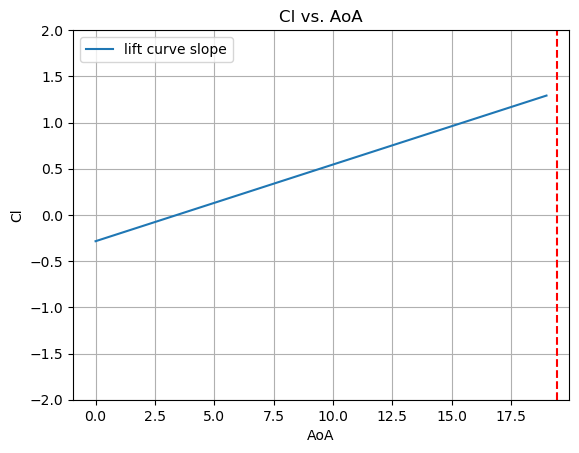

20


In [145]:
# create a list of angles from 0-90
# init a Cl list to hold Cl

angle_list = np.arange(20)
angle_list = np.deg2rad(angle_list)

cl_list = []

for i in angle_list:
    if i < alpha_stall:
        Cl = coefficientLift(cla, i, a0)
        cl_list.append(Cl)

        # elif i > alpha_stall and i < cla_stall:
    #     Cl = coefficientLift(alpha_stall, i, a0)
    #     cl_list.append(Cl)

    else:
        Cl = coefficientLift(cla_stall, i, a0)
        cl_list.append(Cl)

angle_listDeg = np.rad2deg(angle_list)

print(clMax)
plt.plot(angle_listDeg, cl_list, label = 'lift curve slope')
plt.axvline(x=alpha_stallDeg, color='r', linestyle='--')
plt.ylim(-2, 2)
plt.xlabel('AoA')
plt.ylabel('Cl')
plt.title('Cl vs. AoA')
plt.legend(loc='best')
plt.grid(True)
plt.show()

print(len(cl_list))

20


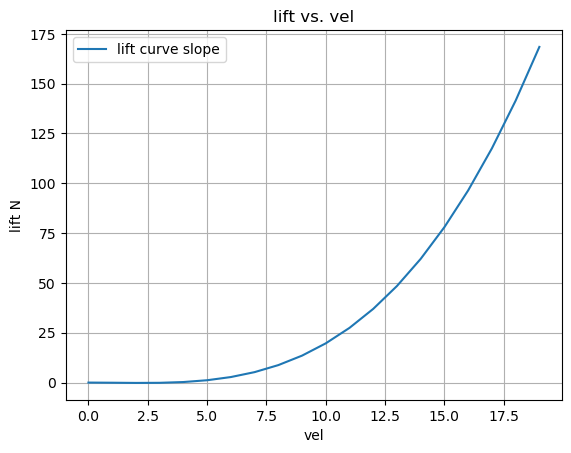

In [141]:
speed_list = np.arange(20)
lift_list = []
dyn_list = []
print(len(speed_list))

for speed, cl in zip(speed_list, cl_list):
    Q = dynamicPressure(air_density, speed)
    dyn_list.append(Q)
    L = lift(cl, Q, area)
    lift_list.append(L)
    
plt.plot(speed_list, lift_list, label = 'lift curve slope')
# plt.axvline(x=alpha_stallDeg, color='r', linestyle='--')
# plt.ylim(-3, 3)
plt.xlabel('vel')
plt.ylabel('lift N')
plt.title('lift vs. vel')
plt.legend(loc='best')
plt.grid(True)
plt.show()

## Load factor vs Speed 

In [118]:
clMax = max(cl_list)
print(clMax)
vStall = stall_speed(mass, g, air_density, area, clMax)
print(vStall)

1.2916669047547733
7.827685994888083


In [119]:
def loadFactor2(cl, rho, vel, s, m, g):
    n = ((cl * (.5 * rho * pow(vel, 2)) * s) / (m * g))
    return n

In [146]:
cl_list2 = []
angle_list2 = np.arange(91)
angle_list2 = np.deg2rad(angle_list2)

for i in angle_list2:
    if i < alpha_stall:
        cl1 = coefficientLift(cla, i, a0)
        cl_list2.append(cl1)

    else:
        Cl = coefficientLift(cla_stall, i, a0)
        cl_list2.append(Cl)

In [138]:
print(max(angle_list2))
print(max(angle_list))
print(max(cl_list2))
print(max(cl_list))
print(len(cl_list2))
print(len(cl_list))

1.5707963267948966
0.33161255787892263
1.2916669047547733
1.2916669047547733
91
20


In [139]:
speed_list = np.arange(30)
n_list = []

for vel in speed_list:
    n = loadFactor2(clMax, air_density, vel, area, mass, g)
    n_list.append(n)

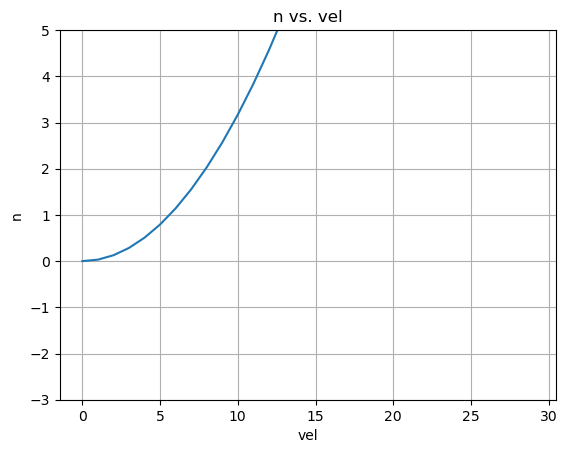

26.66674896906834
168.4385697976486


In [140]:

plt.plot(speed_list, n_list, label = '1')
# plt.ylim(-3, 3)
plt.xlabel('vel')
plt.ylabel('n')
plt.ylim(-3,5)
plt.title('n vs. vel')
plt.grid(True)
plt.show()
print(max(n_list))
print(max(lift_list))

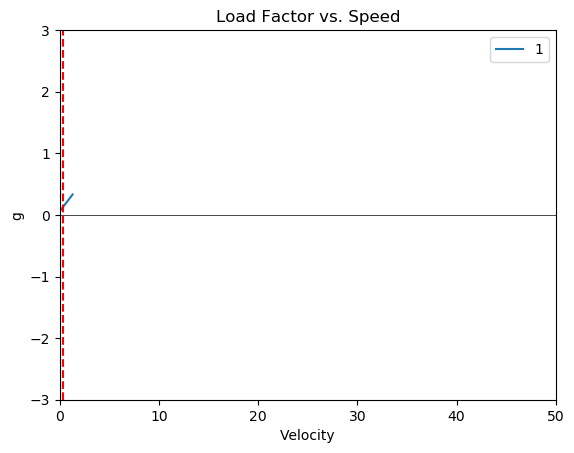

In [97]:
plt.plot(cl_list, angle_list, label = '1')
# plt.plot(velList, liftList, label = '2')
# plt.plot(a0, alpha_stall, label = '3')

# plt.spines['bottom'].set_visible(False)
plt.axhline(0, color='black', lw=0.5)
plt.xlim(0,50) 
plt.axvline(x=alpha_stall, color='r', linestyle='--')
plt.xlabel('Velocity')

plt.ylim(-3,3) 
plt.ylabel('g')

plt.legend(loc='best')
plt.title('Load Factor vs. Speed')
plt.grid(False)
plt.show()